In [1]:
import pandas as pd
import numpy as np
import polars as pl
import time
import matplotlib.pyplot as plt

In [2]:
#set path to REMOTES folder
path = '../../../data'

# Load the data
df = pd.read_csv(f'{path}/sensors_data.csv')

#open and read the text file with patient IDs to remove 
import ast

with open(f'{path}/patients_to_remove2.txt') as f:
    lines = f.read()  # Read the entire content
    patients_to_remove = ast.literal_eval(lines)  # Safely evaluate the string as a list

print(len(patients_to_remove))

#add these to ID's to the patients_to_remove list: ['R013', 'R029', 'R042', 'R078', 'R088', 'R135']
patients_to_remove.extend(['R013', 'R029', 'R042', 'R078', 'R088', 'R135'])
print(len(patients_to_remove))

df = df[~df['Patient ID'].isin(patients_to_remove)]

print(len(df))


27
33
163


In [4]:
print(df.columns)

Index(['Patient ID', 'Biosensor ID', 'file_name', 'Start', 'ecg_qual',
       'wear_hrs', 'acc_qual', 'good_wear_hrs', 'steps', 'MVPA steps', 'age',
       'Resting HR', 'Max HR', 'Min HR', 'Time in MVPA', 'Time in LPA',
       'Time in SB', 'MVPA HR', 'LPA HR', 'SB HR', 'Time in aerobic HR', 'Q1',
       'Q2', 'Q3', 'Q95', 'SDNNhr_1min', 'SDNNhr_5min', 'SDNNhr_10min',
       'SDNNhr_30min', 'SDNNhr_1hr', 'SDNNhr_10s', 'RMSSD', 'SDNN', 'pNN50',
       'MeanNN', 'LF', 'VLF', 'HF', 'LF_HF', 'SD1', 'SD2', 'SDNN24'],
      dtype='object')


In [5]:
#open the demo_data file 
demo_data = pd.read_csv(f'{path}/demo_data.csv')

#change the column title from study_id to Patient ID
demo_data = demo_data.rename(columns={'study_id': 'Patient ID'})

#merge the demo_data with the WS_data only keeping columns 'cpet_quality', cpet_bike, vo2peak_measured, anaerobic_threshold, bmi, age, gender
df = pd.merge(df, demo_data[['Patient ID', 'cpet_quality', 'cpet_bike', 'vo2peak_measured', 'anaerobicthreshold', 'bmi', 'gender', 'height']], on='Patient ID', how='left')

#remove any patients who have a value of 3 in the cpet_quality column
#df = df[df['cpet_quality'] != 3]


#if cpet_bike is 2, multiply vo2peak_measured by 0.9
df['vo2peak_measured'] = np.where(df['cpet_bike'] == 2, df['vo2peak_measured'] * 0.9, df['vo2peak_measured'])


print(len(df))
print(df.columns)

163
Index(['Patient ID', 'Biosensor ID', 'file_name', 'Start', 'ecg_qual',
       'wear_hrs', 'acc_qual', 'good_wear_hrs', 'steps', 'MVPA steps', 'age',
       'Resting HR', 'Max HR', 'Min HR', 'Time in MVPA', 'Time in LPA',
       'Time in SB', 'MVPA HR', 'LPA HR', 'SB HR', 'Time in aerobic HR', 'Q1',
       'Q2', 'Q3', 'Q95', 'SDNNhr_1min', 'SDNNhr_5min', 'SDNNhr_10min',
       'SDNNhr_30min', 'SDNNhr_1hr', 'SDNNhr_10s', 'RMSSD', 'SDNN', 'pNN50',
       'MeanNN', 'LF', 'VLF', 'HF', 'LF_HF', 'SD1', 'SD2', 'SDNN24',
       'cpet_quality', 'cpet_bike', 'vo2peak_measured', 'anaerobicthreshold',
       'bmi', 'gender', 'height'],
      dtype='object')


In [6]:
#for those with a 1 in the gender column, print the average and std of the age, bmi and vo2peak_measured then do the same for those with 0

# For gender = 1
print("For Gender = 1:")
print("Average Age:", df.loc[df['gender'] == 1, 'age'].mean())
print("Age Standard Deviation:", df.loc[df['gender'] == 1, 'age'].std())

print("Average BMI:", df.loc[df['gender'] == 1, 'bmi'].mean())
print("BMI Standard Deviation:", df.loc[df['gender'] == 1, 'bmi'].std())

print("Average VO2peak Measured:", df.loc[df['gender'] == 1, 'vo2peak_measured'].mean())
print("VO2peak Measured Standard Deviation:", df.loc[df['gender'] == 1, 'vo2peak_measured'].std())

print("wear hours: ", df.loc[df['gender'] == 1, 'wear_hrs'].mean())
print("wear hrs: " , df.loc[df['gender'] == 1, 'wear_hrs'].std())

# For gender = 0
print("\nFor Gender = 0:")
print("Average Age:", df.loc[df['gender'] == 0, 'age'].mean())
print("Age Standard Deviation:", df.loc[df['gender'] == 0, 'age'].std())

print("Average BMI:", df.loc[df['gender'] == 0, 'bmi'].mean())
print("BMI Standard Deviation:", df.loc[df['gender'] == 0, 'bmi'].std())

print("Average VO2peak Measured:", df.loc[df['gender'] == 0, 'vo2peak_measured'].mean())
print("VO2peak Measured Standard Deviation:", df.loc[df['gender'] == 0, 'vo2peak_measured'].std())


print("wear hrs: ", df.loc[df['gender'] == 0, 'wear_hrs'].mean())
print("wear hrs: " , df.loc[df['gender'] == 0, 'wear_hrs'].std())


For Gender = 1:
Average Age: 68.5
Age Standard Deviation: 10.253919111386491
Average BMI: 28.149166666666666
BMI Standard Deviation: 4.983687606267345
Average VO2peak Measured: 18.813416666666672
VO2peak Measured Standard Deviation: 4.740372905913082
wear hours:  72.50465185185186
wear hrs:  14.341800256333887

For Gender = 0:
Average Age: 66.90697674418605
Age Standard Deviation: 13.417852275603666
Average BMI: 30.38837209302326
BMI Standard Deviation: 7.53301335084205
Average VO2peak Measured: 15.187674418604649
VO2peak Measured Standard Deviation: 3.714375444013692
wear hrs:  74.20560206718348
wear hrs:  18.22701305614802


In [9]:
#print any columns with missing data:
print(df.isnull().sum())

#remove the columns MVPA HR, LPA HR
df = df.drop(columns=['MVPA HR', 'LPA HR'])



Patient ID             0
Biosensor ID           0
file_name              0
Start                  0
ecg_qual               0
wear_hrs               0
acc_qual               0
good_wear_hrs          0
steps                  0
MVPA steps             0
age                    0
Resting HR             0
Max HR                 0
Min HR                 0
Time in MVPA           0
Time in LPA            0
Time in SB             0
MVPA HR               31
LPA HR                15
SB HR                  0
Time in aerobic HR     0
Q1                     0
Q2                     0
Q3                     0
Q95                    0
SDNNhr_1min            0
SDNNhr_5min            0
SDNNhr_10min           0
SDNNhr_30min           0
SDNNhr_1hr             0
SDNNhr_10s             0
RMSSD                  0
SDNN                   0
pNN50                  0
MeanNN                 0
LF                     0
VLF                    0
HF                     0
LF_HF                  0
SD1                    0


In [10]:
#print any columns with missing data:
print(df.isnull().sum())

Patient ID            0
Biosensor ID          0
file_name             0
Start                 0
ecg_qual              0
wear_hrs              0
acc_qual              0
good_wear_hrs         0
steps                 0
MVPA steps            0
age                   0
Resting HR            0
Max HR                0
Min HR                0
Time in MVPA          0
Time in LPA           0
Time in SB            0
SB HR                 0
Time in aerobic HR    0
Q1                    0
Q2                    0
Q3                    0
Q95                   0
SDNNhr_1min           0
SDNNhr_5min           0
SDNNhr_10min          0
SDNNhr_30min          0
SDNNhr_1hr            0
SDNNhr_10s            0
RMSSD                 0
SDNN                  0
pNN50                 0
MeanNN                0
LF                    0
VLF                   0
HF                    0
LF_HF                 0
SD1                   0
SD2                   0
SDNN24                0
cpet_quality          0
cpet_bike       

In [13]:
print(len(df))

ws = ['steps', 'MVPA steps', 'age',
        'RMSSD', 'SDNN', 'pNN50', 'MeanNN',
       'Resting HR', 'Max HR', 'Min HR', 'Time in MVPA', 'Time in LPA',
       'Time in SB',  'SB HR', 
        'Q1', 'Q2', 'Q3', 'Q95', 'LF', 'HF', 'VLF',
       'LF_HF', 'SD1', 'SD2', 'SDNN24',
       'SDNNhr_1min', 'SDNNhr_5min', 'SDNNhr_10min', 'SDNNhr_30min', 'SDNNhr_1hr',
       'gender', 'bmi']
from scipy.stats import pearsonr
import pandas as pd

# Significance threshold
SIGNIFICANCE_LEVEL = 0.05

# Initialize lists to store results
correlation_results = []

# Loop through each variable in ws to calculate correlation and p-values
for var in ws:
    if var != 'vo2peak_measured':  # Avoid self-correlation
        # Drop rows with missing values for both 'var' and 'vo2peak_measured'
        valid_data = df[[var, 'vo2peak_measured']].dropna()
        corr, p_val = pearsonr(valid_data[var], valid_data['vo2peak_measured'])
        
        # Add a star if p-value is below the significance threshold
        significance = "*" if p_val < SIGNIFICANCE_LEVEL else ""
        correlation_results.append([var, corr, p_val, significance])

# Convert results to a DataFrame
correlation_df = pd.DataFrame(
    correlation_results, 
    columns=['Variable', 'Correlation', 'P-value', 'Significance']
)

# Add significance stars to the correlation column
correlation_df['Correlation'] = correlation_df['Correlation'].apply(
    lambda x: f"{x:.3f}"
)
correlation_df['P-value'] = correlation_df['P-value'].apply(
    lambda x: f"{x:.3f}"
)
correlation_df['Correlation'] += correlation_df['Significance']

# Drop the significance column (optional) for cleaner output
correlation_df = correlation_df.drop(columns=['Significance'])

# Sort by correlation strength (absolute value)
correlation_df = correlation_df.sort_values(by='Correlation', key=lambda x: x.str.replace('*', '').astype(float).abs(), ascending=False)

# Print the results
print(correlation_df)



163
        Variable Correlation P-value
0          steps      0.509*   0.000
2            age     -0.408*   0.000
29    SDNNhr_1hr      0.354*   0.000
21         LF_HF      0.346*   0.000
28  SDNNhr_30min      0.345*   0.000
30        gender      0.337*   0.000
27  SDNNhr_10min      0.333*   0.000
17           Q95      0.332*   0.000
25   SDNNhr_1min      0.331*   0.000
26   SDNNhr_5min      0.330*   0.000
8         Max HR      0.312*   0.000
1     MVPA steps      0.304*   0.000
24        SDNN24      0.282*   0.000
16            Q3      0.278*   0.000
20           VLF      0.273*   0.000
31           bmi     -0.262*   0.001
18            LF      0.249*   0.001
23           SD2      0.224*   0.004
11   Time in LPA      0.221*   0.005
15            Q2      0.218*   0.005
4           SDNN      0.209*   0.007
9         Min HR     -0.165*   0.035
7     Resting HR     -0.157*   0.045
14            Q1      0.155*   0.049
6         MeanNN       0.153   0.051
10  Time in MVPA       0.134   0.0

In [14]:
HRV_long = [ 'SDNNhr_1min', 'SDNNhr_5min', 'SDNNhr_10min', 'SDNNhr_30min', 'SDNNhr_1hr']

#correlate all the variables in the list HRV_long with vo2peak_measured
for var in HRV_long:
    corr = df['vo2peak_measured'].corr(df[var])
    print(f'Correlation between {var} and vo2peak_measured: {corr}')

Correlation between SDNNhr_1min and vo2peak_measured: 0.33085990749595745
Correlation between SDNNhr_5min and vo2peak_measured: 0.3300580404356493
Correlation between SDNNhr_10min and vo2peak_measured: 0.33261091193049525
Correlation between SDNNhr_30min and vo2peak_measured: 0.3454037472153378
Correlation between SDNNhr_1hr and vo2peak_measured: 0.3540023884829171


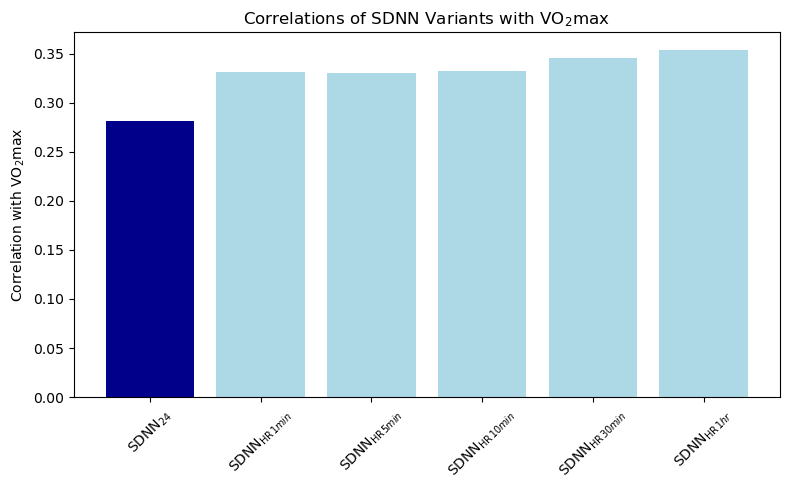

In [15]:
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import pandas as pd

# List of SDNN variables to correlate with 'vo2peak_measured'
sdnn_vars = ['SDNN24', 'SDNNhr_1min', 'SDNNhr_5min', 'SDNNhr_10min', 
             'SDNNhr_30min', 'SDNNhr_1hr']

# Initialize a dictionary to store correlation results
correlation_data = {}

# Calculate Pearson correlations for each variable
for var in sdnn_vars:
    # Drop rows with missing values for the specific SDNN variable and vo2peak_measured
    valid_data = df[[var, 'vo2peak_measured']].dropna()
    corr, _ = pearsonr(valid_data[var], valid_data['vo2peak_measured'])
    correlation_data[var] = corr

# Update variable names for labels with proper subscripts
updated_variables = [r"SDNN$_{24}$" if var == 'SDNN24' else r"SDNN$_{\mathrm{HR}}$$_{" + var.split('_')[1].replace('min', 'min').replace('hr', 'hr') + "}$" for var in sdnn_vars]

# Bar chart settings
variables = updated_variables
correlations = list(correlation_data.values())

# Define colors: SDNN24 in darker color, others in lighter color
colors = ['darkblue' if "SDNN$_{24}$" in var else 'lightblue' for var in variables]

# Create bar plot
plt.figure(figsize=(8, 5))
plt.bar(variables, correlations, color=colors)

# Add labels and title with correct subscripts
plt.ylabel("Correlation with VO$_{2}$max")
plt.title("Correlations of SDNN Variants with VO$_{2}$max")
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.tight_layout()

# Show the plot
plt.show()

In [17]:
features = ['steps', 'MVPA steps', 
       'Resting HR', 'Max HR', 'Min HR', 'Time in MVPA', 'Time in LPA',
       'Time in SB', 'SB HR', 
        'Q1', 'Q2', 'Q3', 'Q95', 'RMSSD', 'SDNN', 'pNN50', 'MeanNN','LF', 'HF', 'VLF',
       'LF_HF', 'SD1', 'SD2', 'SDNN24',
       'SDNNhr_1min', 'SDNNhr_5min', 'SDNNhr_10min', 'SDNNhr_30min', 'SDNNhr_1hr',
       'gender', 'bmi', 'age']


# Calculate the correlation matrix
correlation_matrix = df[features].corr()

# Find pairs of features with a correlation above 0.9
threshold = 0.9
high_corr_pairs = []

for i in range(len(features)):
    for j in range(i + 1, len(features)):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            high_corr_pairs.append(
                (features[i], features[j], correlation_matrix.iloc[i, j])
            )

# Print the pairs with high correlation
print("Features with correlation above 0.9:")
for pair in high_corr_pairs:
    print(f"{pair[0]} and {pair[1]}: {pair[2]:.2f}")


Features with correlation above 0.9:
RMSSD and pNN50: 0.93
RMSSD and SD1: 1.00
SDNN and SD2: 1.00
pNN50 and SD1: 0.93
SDNN24 and SDNNhr_1min: 0.96
SDNN24 and SDNNhr_5min: 0.95
SDNN24 and SDNNhr_10min: 0.94
SDNN24 and SDNNhr_30min: 0.93
SDNN24 and SDNNhr_1hr: 0.91
SDNNhr_1min and SDNNhr_5min: 1.00
SDNNhr_1min and SDNNhr_10min: 1.00
SDNNhr_1min and SDNNhr_30min: 0.99
SDNNhr_1min and SDNNhr_1hr: 0.97
SDNNhr_5min and SDNNhr_10min: 1.00
SDNNhr_5min and SDNNhr_30min: 0.99
SDNNhr_5min and SDNNhr_1hr: 0.98
SDNNhr_10min and SDNNhr_30min: 0.99
SDNNhr_10min and SDNNhr_1hr: 0.98
SDNNhr_30min and SDNNhr_1hr: 0.99


### From above results can see all feature relationships with correlations >0.9
### From those features that are highly correlated we want to keep in those with strongest associations with VO2max
### Therefore, SD1, RMSSD and SDNN were removed from analysis.

In [ ]:
ws = ['steps', 'MVPA steps', 
       'Resting HR', 'Max HR', 'Min HR', 'Time in MVPA', 'Time in LPA',
       'Time in SB', 'SB HR', 
        'Q1', 'Q2', 'Q3', 'Q95', 'pNN50', 'MeanNN','LF', 'HF', 'VLF',
       'LF_HF', 'SD2', 'SDNN24',
       'SDNNhr_1min', 'SDNNhr_5min', 'SDNNhr_10min', 'SDNNhr_30min', 'SDNNhr_1hr',
       'gender', 'bmi', 'age']


print(len(ws))

In [25]:
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from scipy.stats import pearsonr
import numpy as np

# Prepare data for Lasso regression
X = df[ws]
y = df['vo2peak_measured']

# Handle categorical variable 'gender' (assuming binary categorical: 0 or 1)
X = pd.get_dummies(X, columns=['gender'], drop_first=True)  # Encode if needed

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize LassoCV with 5-fold cross-validation
alphas = np.linspace(0.01, 1, 100)  # Avoid alpha=0 since it leads to OLS
kf = KFold(n_splits=5, shuffle=True, random_state=43)

# Custom loop to calculate correlation for each alpha
alpha_correlations = []
for alpha in alphas:
    fold_correlations = []
    for train_idx, val_idx in kf.split(X_train_scaled):
        # Split train and validation sets
        X_fold_train, X_fold_val = X_train_scaled[train_idx], X_train_scaled[val_idx]
        y_fold_train, y_fold_val = y_train.iloc[train_idx], y_train.iloc[val_idx]
        
        # Train Lasso model
        lasso = LassoCV(alphas=[alpha], cv=None, random_state=42)
        lasso.fit(X_fold_train, y_fold_train)
        
        # Predict on validation set
        y_pred_val = lasso.predict(X_fold_val)
        
        # Calculate Pearson correlation
        correlation, _ = pearsonr(y_fold_val, y_pred_val)
        fold_correlations.append(correlation)
    
    # Store mean correlation for this alpha
    alpha_correlations.append(np.mean(fold_correlations))

# Find the alpha with the highest correlation
best_alpha_idx = np.argmax(alpha_correlations)
best_alpha = alphas[best_alpha_idx]

print(f"Best alpha value (highest correlation): {best_alpha:.4f}")
print(f"Highest mean correlation: {alpha_correlations[best_alpha_idx]:.4f}")

# Train the final model with the best alpha and evaluate on the test set
lasso_best = LassoCV(alphas=[best_alpha], cv=None, random_state=42)
lasso_best.fit(X_train_scaled, y_train)
y_pred_test = lasso_best.predict(X_test_scaled)

# Evaluate on test set
test_correlation, _ = pearsonr(y_test, y_pred_test)
print(f"Test Correlation: {test_correlation:.4f}")


/Users/aronsyversen/miniforge3/envs/hr-env/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.22886347666542406, tolerance: 0.16062040024096383
  model = cd_fast.enet_coordinate_descent_gram(
/Users/aronsyversen/miniforge3/envs/hr-env/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.475898505272994, tolerance: 0.19995595879518072
  model = cd_fast.enet_coordinate_descent_gram(
/Users/aronsyversen/miniforge3/envs/hr-env/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.5047885954340927, tolerance: 0.17770293518072292
  model = cd_fast.enet_coordinate_descent_gram

Best alpha value (highest correlation): 0.2500
Highest mean correlation: 0.6852
Test Correlation: 0.6642


In [27]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd


# Prepare data for Lasso regression using the cleaned list
X = df[ws]
y = df['vo2peak_measured']

# Handle categorical variable 'gender' (assuming binary categorical: 0 or 1)
X = pd.get_dummies(X, columns=['gender'], drop_first=True)  # Encode if needed

# Proceed with train-test split, scaling, and Lasso regression as before
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lasso = Lasso(alpha=0.3)  # Adjust alpha as needed
lasso.fit(X_train_scaled, y_train)

# Print coefficients for feature importance
print("\nLasso Regression Coefficients:")
for feature, coef in zip(X.columns, lasso.coef_):
    print(f"{feature}: {coef}")

# Evaluate the model
y_pred = lasso.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"\nMean Squared Error: {mse}")
print(f"R-squared: {r2}")

#print the feaures with non-zero coefficients
print("\nFeatures with non-zero coefficients:")
for feature, coef in zip(X.columns, lasso.coef_):
    if coef != 0:
        print(f"{feature}: {coef}")


Lasso Regression Coefficients:
steps: 1.1860566385357982
MVPA steps: 0.0
age: -1.3463331842246262
RMSSD: -0.0
SDNN: 0.0
pNN50: -0.0
MeanNN: 0.2663462701927376
Resting HR: -0.0
Max HR: 0.22228094818594785
Min HR: -0.1933610882852509
Time in MVPA: -0.0
Time in LPA: 0.0
Time in SB: -0.0
SB HR: -0.0
Q1: 0.0
Q2: -0.0
Q3: -0.0
Q95: 0.0
LF: 0.0
HF: -0.0
VLF: 0.0
LF_HF: 0.5510001348783793
SD1: -0.0
SD2: 0.0
SDNN24: 0.0
SDNNhr_1min: 0.0
SDNNhr_5min: 0.0
SDNNhr_10min: 0.0
SDNNhr_30min: 0.0
SDNNhr_1hr: 0.6581928623363832
bmi: -0.8214355449757159
gender_1: 0.7811965797805235

Mean Squared Error: 16.074091416711365
R-squared: 0.43996045730509836

Features with non-zero coefficients:
steps: 1.1860566385357982
age: -1.3463331842246262
MeanNN: 0.2663462701927376
Max HR: 0.22228094818594785
Min HR: -0.1933610882852509
LF_HF: 0.5510001348783793
SDNNhr_1hr: 0.6581928623363832
bmi: -0.8214355449757159
gender_1: 0.7811965797805235


In [28]:

features = ['steps', 'age', 'Max HR', 'Min HR', 'MeanNN', 'LF_HF', 'SDNNhr_1hr', 'bmi', 'gender']

#print the avergae and std of the features with non-zero coefficients
for feature in features:
    print(f"Average {feature}:", df[feature].mean())
    print(f"{feature} Standard Deviation:", df[feature].std())

Average steps: 3562.734215918307
steps Standard Deviation: 2924.233735415666
Average age: 68.079754601227
age Standard Deviation: 11.153796671372547
Average Max HR: 135.59202453987731
Max HR Standard Deviation: 15.695721606225527
Average Min HR: 59.30061349693251
Min HR Standard Deviation: 7.463603016751933
Average MeanNN: 881.4899332254283
MeanNN Standard Deviation: 125.88699405740864
Average LF_HF: 4.625088479017844
LF_HF Standard Deviation: 6.259538872402666
Average SDNNhr_1hr: 79.50458198709924
SDNNhr_1hr Standard Deviation: 28.926580045231667
Average bmi: 28.739877300613493
bmi Standard Deviation: 5.825492506888571
Average gender: 0.7361963190184049
gender Standard Deviation: 0.44205218477057756


In [33]:
#print the number of rows with a value below 15 in vo2peak_measured
print("Number of rows with VO2peak Measured below 15:", df[df['vo2peak_measured'] < 15].shape[0])

#check for any mising data
print(df.isnull().sum())

Number of rows with VO2peak Measured below 15: 49
Patient ID            0
Biosensor ID          0
file_name             0
Start                 0
ecg_qual              0
wear_hrs              0
acc_qual              0
good_wear_hrs         0
steps                 0
MVPA steps            0
age                   0
Resting HR            0
Max HR                0
Min HR                0
Time in MVPA          0
Time in LPA           0
Time in SB            0
SB HR                 0
Time in aerobic HR    0
Q1                    0
Q2                    0
Q3                    0
Q95                   0
SDNNhr_1min           0
SDNNhr_5min           0
SDNNhr_10min          0
SDNNhr_30min          0
SDNNhr_1hr            0
SDNNhr_10s            0
RMSSD                 0
SDNN                  0
pNN50                 0
MeanNN                0
LF                    0
VLF                   0
HF                    0
LF_HF                 0
SD1                   0
SD2                   0
SDNN24        

In [34]:

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from scipy.stats import pearsonr


# Define feature sets
feature_sets = {
    "With HRV": ['steps', 'age', 'Max HR', 'Min HR', 'MeanNN', 'LF_HF', 'SDNNhr_1hr', 'bmi', 'gender'],
    "Without HRV": ['steps', 'age', 'gender', 'bmi', 'Max HR', 'Min HR']
}

# Initialize a dictionary to store results
results = {}

# VO₂max threshold
threshold = 15

# Loop through each feature set
for label, features in feature_sets.items():
    print(f"\nEvaluating Model: {label}")
    
    # Define X (predictors) and y (target)
    X = df[features]
    y = df['vo2peak_measured']

    # Initialize the scaler and scale the entire dataset
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Initialize the Linear Regression model
    model = LinearRegression()

    # Set up 5-fold cross-validation
    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    # Initialize lists to store metrics for each fold
    fold_correlations = []
    fold_mae = []
    fold_rmse = []
    fold_ape = []

    # Additional lists for patients with VO₂max below the threshold
    fold_correlations_below = []
    fold_mae_below = []
    fold_rmse_below = []
    fold_ape_below = []

    # Perform cross-validation manually to calculate metrics for each fold
    for train_index, test_index in kf.split(X_scaled):
        X_train, X_test = X_scaled[train_index], X_scaled[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # Fit the model on each training fold
        model.fit(X_train, y_train)
        
        # Predict on the test fold
        y_pred_fold = model.predict(X_test)
        
        # Calculate metrics for this fold (all data)
        correlation_fold, _ = pearsonr(y_test, y_pred_fold)
        mae_fold = mean_absolute_error(y_test, y_pred_fold)
        rmse_fold = np.sqrt(mean_squared_error(y_test, y_pred_fold))
        ape_fold = np.mean(np.abs((y_test - y_pred_fold) / y_test) * 100)

        # Append metrics to lists
        fold_correlations.append(correlation_fold)
        fold_mae.append(mae_fold)
        fold_rmse.append(rmse_fold)
        fold_ape.append(ape_fold)

        # Subset for VO₂max < threshold
        below_threshold_indices = y_test < threshold
        y_test_below = y_test[below_threshold_indices]
        y_pred_below = y_pred_fold[below_threshold_indices]

        if len(y_test_below) > 0:  # Ensure there are data points
            correlation_below, _ = pearsonr(y_test_below, y_pred_below)
            mae_below = mean_absolute_error(y_test_below, y_pred_below)
            rmse_below = np.sqrt(mean_squared_error(y_test_below, y_pred_below))
            ape_below = np.mean(np.abs((y_test_below - y_pred_below) / y_test_below) * 100)

            # Append metrics for below-threshold group
            fold_correlations_below.append(correlation_below)
            fold_mae_below.append(mae_below)
            fold_rmse_below.append(rmse_below)
            fold_ape_below.append(ape_below)
    
    

    # Calculate average metrics and std across all folds
    avg_correlation = np.mean(fold_correlations)
    std_correlation = np.std(fold_correlations)
    avg_mae = np.mean(fold_mae)
    std_mae = np.std(fold_mae)
    avg_rmse = np.mean(fold_rmse)
    std_rmse = np.std(fold_rmse)
    avg_ape = np.mean(fold_ape)
    std_ape = np.std(fold_ape)

    avg_correlation_below = np.mean(fold_correlations_below) if fold_correlations_below else None
    std_correlation_below = np.std(fold_correlations_below) if fold_correlations_below else None
    avg_mae_below = np.mean(fold_mae_below) if fold_mae_below else None
    std_mae_below = np.std(fold_mae_below) if fold_mae_below else None
    avg_rmse_below = np.mean(fold_rmse_below) if fold_rmse_below else None
    std_rmse_below = np.std(fold_rmse_below) if fold_rmse_below else None
    avg_ape_below = np.mean(fold_ape_below) if fold_ape_below else None
    std_ape_below = np.std(fold_ape_below) if fold_ape_below else None

    # Store results for this model
    results[label] = {
        "Overall": {
            "Average Correlation": avg_correlation,
            "Std Correlation": std_correlation,
            "Average MAE": avg_mae,
            "Std MAE": std_mae,
            "Average RMSE": avg_rmse,
            "Std RMSE": std_rmse,
            "Average APE": avg_ape,
            "Std APE": std_ape
        },
        f"VO₂max < {threshold}": {
            "Average Correlation": avg_correlation_below,
            "Std Correlation": std_correlation_below,
            "Average MAE": avg_mae_below,
            "Std MAE": std_mae_below,
            "Average RMSE": avg_rmse_below,
            "Std RMSE": std_rmse_below,
            "Average APE": avg_ape_below,
            "Std APE": std_ape_below
        }
    }
# Compare the results
print("\nComparison of Models:")
for label, metrics in results.items():
    print(f"\nModel: {label}")
    for group, group_metrics in metrics.items():
        print(f"  {group}:")
        for metric_name, metric_value in group_metrics.items():
            if metric_value is not None:
                # Check if the metric is paired with a standard deviation
                if "Std" not in metric_name:
                    std_metric_name = f"Std {metric_name.split(' ')[1]}"  # Match the corresponding Std metric
                    if std_metric_name in group_metrics:
                        print(f"    {metric_name}: {metric_value:.4f} ({group_metrics[std_metric_name]:.4f})")
                    else:
                        print(f"    {metric_name}: {metric_value:.4f}")
            else:
                print(f"    {metric_name}: N/A (No Data)")


Evaluating Model: With HRV

Evaluating Model: Without HRV

Comparison of Models:

Model: With HRV
  Overall:
    Average Correlation: 0.7162 (0.0672)
    Average MAE: 2.5360 (0.3283)
    Average RMSE: 3.3065 (0.5211)
    Average APE: 15.0450 (2.3359)
  VO₂max < 15:
    Average Correlation: 0.2790 (0.2791)
    Average MAE: 2.6620 (0.3809)
    Average RMSE: 3.1457 (0.4115)
    Average APE: 21.8194 (4.0010)

Model: Without HRV
  Overall:
    Average Correlation: 0.6756 (0.0844)
    Average MAE: 2.7350 (0.4234)
    Average RMSE: 3.4892 (0.5818)
    Average APE: 16.0815 (2.8177)
  VO₂max < 15:
    Average Correlation: 0.2791 (0.3295)
    Average MAE: 2.6420 (0.3524)
    Average RMSE: 3.1253 (0.4306)
    Average APE: 21.7574 (3.6713)


In [45]:
# Define feature set
feature_sets = {
    "With HRV": ['steps', 'age', 'Max HR', 'Min HR', 'MeanNN', 'LF_HF', 'SDNNhr_1hr', 'bmi', 'gender'],
    "Without HRV": ['steps', 'age', 'gender', 'bmi', 'Max HR', 'Min HR']
}
# Define feature sets
feature_sets = {
    "With HRV": ['steps', 'age', 'gender', 'bmi', 'SDNNhr_1hr', 'LF_HF'], #'MeanNN', 'RMSSD'],
    "Without HRV": ['steps', 'age', 'gender', 'bmi']
}

# Initialize a dictionary to store results
results = {}

# VO₂max threshold
threshold = 15


# Loop through each feature set
for label, features in feature_sets.items():
    print(f"\nEvaluating Model: {label}")

    # Initialize a nested dictionary for the label if not already present
    if label not in results:
        results[label] = {}

    # Define X (predictors) and y (target)
    X = df[features]
    y = df['vo2peak_measured']

    # Initialize the scaler and scale the entire dataset
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Initialize the Linear Regression model
    model = LinearRegression()

    # Set up 10-fold cross-validation
    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    # Initialize lists to store metrics for each fold
    fold_correlations = []
    fold_mae = []
    fold_rmse = []
    fold_ape = []

    # Additional lists for patients with VO₂max below the threshold
    fold_correlations_below = []
    fold_mae_below = []
    fold_rmse_below = []
    fold_ape_below = []

    # Perform cross-validation manually to calculate metrics for each fold
    for train_index, test_index in kf.split(X_scaled):
        X_train, X_test = X_scaled[train_index], X_scaled[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # Fit the model on each training fold
        model.fit(X_train, y_train)
        
        # Predict on the test fold
        y_pred_fold = model.predict(X_test)
        
        # Calculate metrics for this fold (all data)
        correlation_fold, _ = pearsonr(y_test, y_pred_fold)
        mae_fold = mean_absolute_error(y_test, y_pred_fold)
        rmse_fold = np.sqrt(mean_squared_error(y_test, y_pred_fold))
        ape_fold = np.mean(np.abs((y_test - y_pred_fold) / y_test) * 100)

        # Append metrics to lists
        fold_correlations.append(correlation_fold)
        fold_mae.append(mae_fold)
        fold_rmse.append(rmse_fold)
        fold_ape.append(ape_fold)

        # Subset for VO₂max < threshold
        below_threshold_indices = y_test < threshold
        y_test_below = y_test[below_threshold_indices]
        y_pred_below = y_pred_fold[below_threshold_indices]

        if len(y_test_below) > 0:  # Ensure there are data points
            correlation_below, _ = pearsonr(y_test_below, y_pred_below)
            mae_below = mean_absolute_error(y_test_below, y_pred_below)
            rmse_below = np.sqrt(mean_squared_error(y_test_below, y_pred_below))
            ape_below = np.mean(np.abs((y_test_below - y_pred_below) / y_test_below) * 100)

            # Append metrics for below-threshold group
            fold_correlations_below.append(correlation_below)
            fold_mae_below.append(mae_below)
            fold_rmse_below.append(rmse_below)
            fold_ape_below.append(ape_below)
    
    # Store fold-level metrics for each model
    results[label]["Fold-Level"] = {
        "Correlation": fold_correlations,
        "MAE": fold_mae,
        "RMSE": fold_rmse,
        "APE": fold_ape
    }

    # Store fold-level metrics for below-threshold subset
    results[label][f"VO₂max < {threshold}"] = {
        "Fold-Level": {
            "Correlation": fold_correlations_below,
            "MAE": fold_mae_below,
            "RMSE": fold_rmse_below,
            "APE": fold_ape_below
        },
        "Overall": {
            "Average Correlation": np.mean(fold_correlations_below) if fold_correlations_below else None,
            "Std Correlation": np.std(fold_correlations_below) if fold_correlations_below else None,
            "Average MAE": np.mean(fold_mae_below) if fold_mae_below else None,
            "Std MAE": np.std(fold_mae_below) if fold_mae_below else None,
            "Average RMSE": np.mean(fold_rmse_below) if fold_rmse_below else None,
            "Std RMSE": np.std(fold_rmse_below) if fold_rmse_below else None,
            "Average APE": np.mean(fold_ape_below) if fold_ape_below else None,
            "Std APE": np.std(fold_ape_below) if fold_ape_below else None
        }
    }

    # Calculate average metrics and std across all folds for all data
    results[label]["Overall"] = {
        "Average Correlation": np.mean(fold_correlations),
        "Std Correlation": np.std(fold_correlations),
        "Average MAE": np.mean(fold_mae),
        "Std MAE": np.std(fold_mae),
        "Average RMSE": np.mean(fold_rmse),
        "Std RMSE": np.std(fold_rmse),
        "Average APE": np.mean(fold_ape),
        "Std APE": np.std(fold_ape)
    }

from scipy.stats import ttest_rel, shapiro

# Initialize a dictionary to store t-test results
t_test_results = {
    "Whole Dataset": {},
    f"VO₂max < {threshold}": {}
}

# Metrics to compare
metrics = ["Correlation", "MAE", "RMSE", "APE"]

# Run paired t-tests for the whole dataset
for metric in metrics:
    print(f"\nPaired t-Test for Whole Dataset - {metric}")

    # Extract data for both groups
    data_with_hrv = results["With HRV"]["Fold-Level"][metric]
    data_without_hrv = results["Without HRV"]["Fold-Level"][metric]

    # Check normality of differences
    differences = [a - b for a, b in zip(data_with_hrv, data_without_hrv)]
    stat, p_value = shapiro(differences)
    print(f"  Shapiro-Wilk Test for Differences: statistic = {stat:.4f}, p-value = {p_value:.4f}")

    # Run paired t-test if differences are normal
    if p_value > 0.05:
        t_stat, p_val = ttest_rel(data_with_hrv, data_without_hrv)
        t_test_results["Whole Dataset"][metric] = {"t-statistic": t_stat, "p-value": p_val}
        print(f"  Paired t-Test: t-statistic = {t_stat:.4f}, p-value = {p_val:.4f}")
    else:
        print(f"  Differences are not normally distributed. Consider using a non-parametric test.")


Evaluating Model: With HRV

Evaluating Model: Without HRV

Paired t-Test for Whole Dataset - Correlation
  Shapiro-Wilk Test for Differences: statistic = 0.9957, p-value = 0.9954
  Paired t-Test: t-statistic = 6.5857, p-value = 0.0028

Paired t-Test for Whole Dataset - MAE
  Shapiro-Wilk Test for Differences: statistic = 0.9437, p-value = 0.6922
  Paired t-Test: t-statistic = -2.5719, p-value = 0.0619

Paired t-Test for Whole Dataset - RMSE
  Shapiro-Wilk Test for Differences: statistic = 0.9025, p-value = 0.4239
  Paired t-Test: t-statistic = -6.7779, p-value = 0.0025

Paired t-Test for Whole Dataset - APE
  Shapiro-Wilk Test for Differences: statistic = 0.9105, p-value = 0.4707
  Paired t-Test: t-statistic = -2.6806, p-value = 0.0552


In [37]:
from scipy.stats import ttest_rel

# Initialize a dictionary to store paired t-test results
paired_ttest_results = {}

# Metrics to compare
metrics = ["Correlation", "MAE", "RMSE", "APE"]

# Perform paired t-tests for each metric across all folds
for metric in metrics:
    print(f"\nPerforming paired t-test for {metric}...")

    # Access fold-level data for both models
    data_with_hrv = results["With HRV"]["Fold-Level"][metric]
    data_without_hrv = results["Without HRV"]["Fold-Level"][metric]

    # Perform paired t-test
    t_stat, p_value = ttest_rel(data_with_hrv, data_without_hrv)

    # Store results
    paired_ttest_results[metric] = {
        "t-statistic": t_stat,
        "p-value": p_value
    }

    # Print results
    print(f"  t-statistic: {t_stat:.4f}")
    print(f"  p-value: {p_value:.4f}")
    if p_value < 0.05:
        print("  -> Significant difference (p < 0.05)")
    else:
        print("  -> No significant difference (p ≥ 0.05)")

# Summary of all t-tests
print("\nSummary of Paired t-Test Results:")
for metric, result in paired_ttest_results.items():
    print(f"{metric}: t-statistic = {result['t-statistic']:.4f}, p-value = {result['p-value']:.4f}")
    if result["p-value"] < 0.05:
        print("  -> Significant difference (p < 0.05)")
    else:
        print("  -> No significant difference (p ≥ 0.05)")


Performing paired t-test for Correlation...
  t-statistic: 3.7498
  p-value: 0.0200
  -> Significant difference (p < 0.05)

Performing paired t-test for MAE...
  t-statistic: -2.5071
  p-value: 0.0663
  -> No significant difference (p ≥ 0.05)

Performing paired t-test for RMSE...
  t-statistic: -4.4141
  p-value: 0.0116
  -> Significant difference (p < 0.05)

Performing paired t-test for APE...
  t-statistic: -2.1675
  p-value: 0.0961
  -> No significant difference (p ≥ 0.05)

Summary of Paired t-Test Results:
Correlation: t-statistic = 3.7498, p-value = 0.0200
  -> Significant difference (p < 0.05)
MAE: t-statistic = -2.5071, p-value = 0.0663
  -> No significant difference (p ≥ 0.05)
RMSE: t-statistic = -4.4141, p-value = 0.0116
  -> Significant difference (p < 0.05)
APE: t-statistic = -2.1675, p-value = 0.0961
  -> No significant difference (p ≥ 0.05)


In [44]:
# Define feature set
feature_sets = {
    "With HRV": ['steps', 'age', 'Max HR', 'Min HR', 'MeanNN', 'LF_HF', 'SDNNhr_1hr', 'bmi', 'gender'],
    "Without HRV": ['steps', 'age', 'gender', 'bmi', 'Max HR', 'Min HR']
}

# Initialize a dictionary to store results
results = {}

# Loop through each feature set
for label, features in feature_sets.items():
    print(f"\nEvaluating Model: {label}")

    # Initialize a nested dictionary for the label if not already present
    if label not in results:
        results[label] = {}

    # Define X (predictors) and y (target)
    X = df[features]
    y = df['vo2peak_measured']

    # Initialize the scaler and scale the entire dataset
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Initialize the Linear Regression model
    model = LinearRegression()

    # Set up 5-fold cross-validation
    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    # Initialize lists to store metrics for each fold
    fold_correlations = []
    fold_mae = []
    fold_rmse = []
    fold_ape = []

    # Perform cross-validation manually to calculate metrics for each fold
    for train_index, test_index in kf.split(X_scaled):
        X_train, X_test = X_scaled[train_index], X_scaled[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # Fit the model on each training fold
        model.fit(X_train, y_train)
        
        # Predict on the test fold
        y_pred_fold = model.predict(X_test)
        
        # Calculate metrics for this fold (all data)
        correlation_fold, _ = pearsonr(y_test, y_pred_fold)
        mae_fold = mean_absolute_error(y_test, y_pred_fold)
        rmse_fold = np.sqrt(mean_squared_error(y_test, y_pred_fold))
        ape_fold = np.mean(np.abs((y_test - y_pred_fold) / y_test) * 100)

        # Append metrics to lists
        fold_correlations.append(correlation_fold)
        fold_mae.append(mae_fold)
        fold_rmse.append(rmse_fold)
        fold_ape.append(ape_fold)

    # Store fold-level metrics for each model
    results[label]["Fold-Level"] = {
        "Correlation": fold_correlations,
        "MAE": fold_mae,
        "RMSE": fold_rmse,
        "APE": fold_ape
    }

    # Calculate average metrics and std across all folds for all data
    results[label]["Overall"] = {
        "Average Correlation": np.mean(fold_correlations),
        "Std Correlation": np.std(fold_correlations),
        "Average MAE": np.mean(fold_mae),
        "Std MAE": np.std(fold_mae),
        "Average RMSE": np.mean(fold_rmse),
        "Std RMSE": np.std(fold_rmse),
        "Average APE": np.mean(fold_ape),
        "Std APE": np.std(fold_ape)
    }

from scipy.stats import ttest_rel, shapiro

# Initialize a dictionary to store t-test results
t_test_results = {}

# Metrics to compare
metrics = ["Correlation", "MAE", "RMSE", "APE"]

# Run paired t-tests for the whole dataset
for metric in metrics:
    print(f"\nPaired t-Test for Whole Dataset - {metric}")

    # Extract data for both groups
    data_with_hrv = results["With HRV"]["Fold-Level"][metric]
    data_without_hrv = results["Without HRV"]["Fold-Level"][metric]

    # Check normality of differences
    differences = [a - b for a, b in zip(data_with_hrv, data_without_hrv)]
    stat, p_value = shapiro(differences)
    print(f"  Shapiro-Wilk Test for Differences: statistic = {stat:.4f}, p-value = {p_value:.4f}")

    # Run paired t-test if differences are normal
    if p_value > 0.05:
        t_stat, p_val = ttest_rel(data_with_hrv, data_without_hrv)
        t_test_results[metric] = {"t-statistic": t_stat, "p-value": p_val}
        print(f"  Paired t-Test: t-statistic = {t_stat:.4f}, p-value = {p_val:.4f}")
    else:
        print(f"  Differences are not normally distributed. Consider using a non-parametric test.")



Evaluating Model: With HRV

Evaluating Model: Without HRV

Paired t-Test for Whole Dataset - Correlation
  Shapiro-Wilk Test for Differences: statistic = 0.8872, p-value = 0.3434
  Paired t-Test: t-statistic = 3.7498, p-value = 0.0200

Paired t-Test for Whole Dataset - MAE
  Shapiro-Wilk Test for Differences: statistic = 0.7854, p-value = 0.0612
  Paired t-Test: t-statistic = -2.5071, p-value = 0.0663

Paired t-Test for Whole Dataset - RMSE
  Shapiro-Wilk Test for Differences: statistic = 0.8286, p-value = 0.1357
  Paired t-Test: t-statistic = -4.4141, p-value = 0.0116

Paired t-Test for Whole Dataset - APE
  Shapiro-Wilk Test for Differences: statistic = 0.7892, p-value = 0.0660
  Paired t-Test: t-statistic = -2.1675, p-value = 0.0961
